In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
# Load the dataset
file_path = 'Loan.csv'  
data = pd.read_csv(file_path)

# Drop the 'ApplicationDate' column
data = data.drop(columns=['ApplicationDate'])

In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
# Display the last few rows
print("Last 5 rows of the dataset:")
display(data.tail())

Last 5 rows of the dataset:


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,Employed,High School,36,14760,72,Married,3,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,20,53227,574,Employed,Associate,0,32055,48,Married,0,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [5]:
# Display column names line by line
print("Column Names:")
for column in data.columns:
    print(column)

Column Names:
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


In [6]:
# Display basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCred

In [7]:
# Display summary statistics
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [8]:
# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
display(missing_values)


Missing Values:


Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

In [9]:
# Encode categorical variables
print("\nEncoding Categorical Variables...")
label_encoders = {}
encoding_mappings = {}

categorical_cols = data.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
        # Store the mapping for each column
        encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    # Display the encoding mappings
    print("\nEncoding Mappings:")
    for col, mapping in encoding_mappings.items():
        print(f"{col}: {mapping}")
else:
    print("No categorical columns found for encoding.")

# Correlation analysis
print("\nFeature Correlations with 'LoanApproved' (ABSOLUTE VALUES ARE CONSIDERED):")
correlations = data.corr()['LoanApproved'].abs().sort_values(ascending=False)  # Use absolute value for correlations
print(correlations)


Encoding Categorical Variables...

Encoding Mappings:
EmploymentStatus: {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2}
EducationLevel: {'Associate': 0, 'Bachelor': 1, 'Doctorate': 2, 'High School': 3, 'Master': 4}
MaritalStatus: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widowed': 3}
HomeOwnershipStatus: {'Mortgage': 0, 'Other': 1, 'Own': 2, 'Rent': 3}
LoanPurpose: {'Auto': 0, 'Debt Consolidation': 1, 'Education': 2, 'Home': 3, 'Other': 4}

Feature Correlations with 'LoanApproved' (ABSOLUTE VALUES ARE CONSIDERED):
LoanApproved                  1.000000
RiskScore                     0.766137
MonthlyIncome                 0.604101
AnnualIncome                  0.597900
TotalDebtToIncomeRatio        0.410399
InterestRate                  0.301646
BaseInterestRate              0.247263
LoanAmount                    0.239496
NetWorth                      0.187892
MonthlyLoanPayment            0.184272
TotalAssets                   0.184011
CreditScore                   0.142000
Age 


Generating distribution plots for selected features...


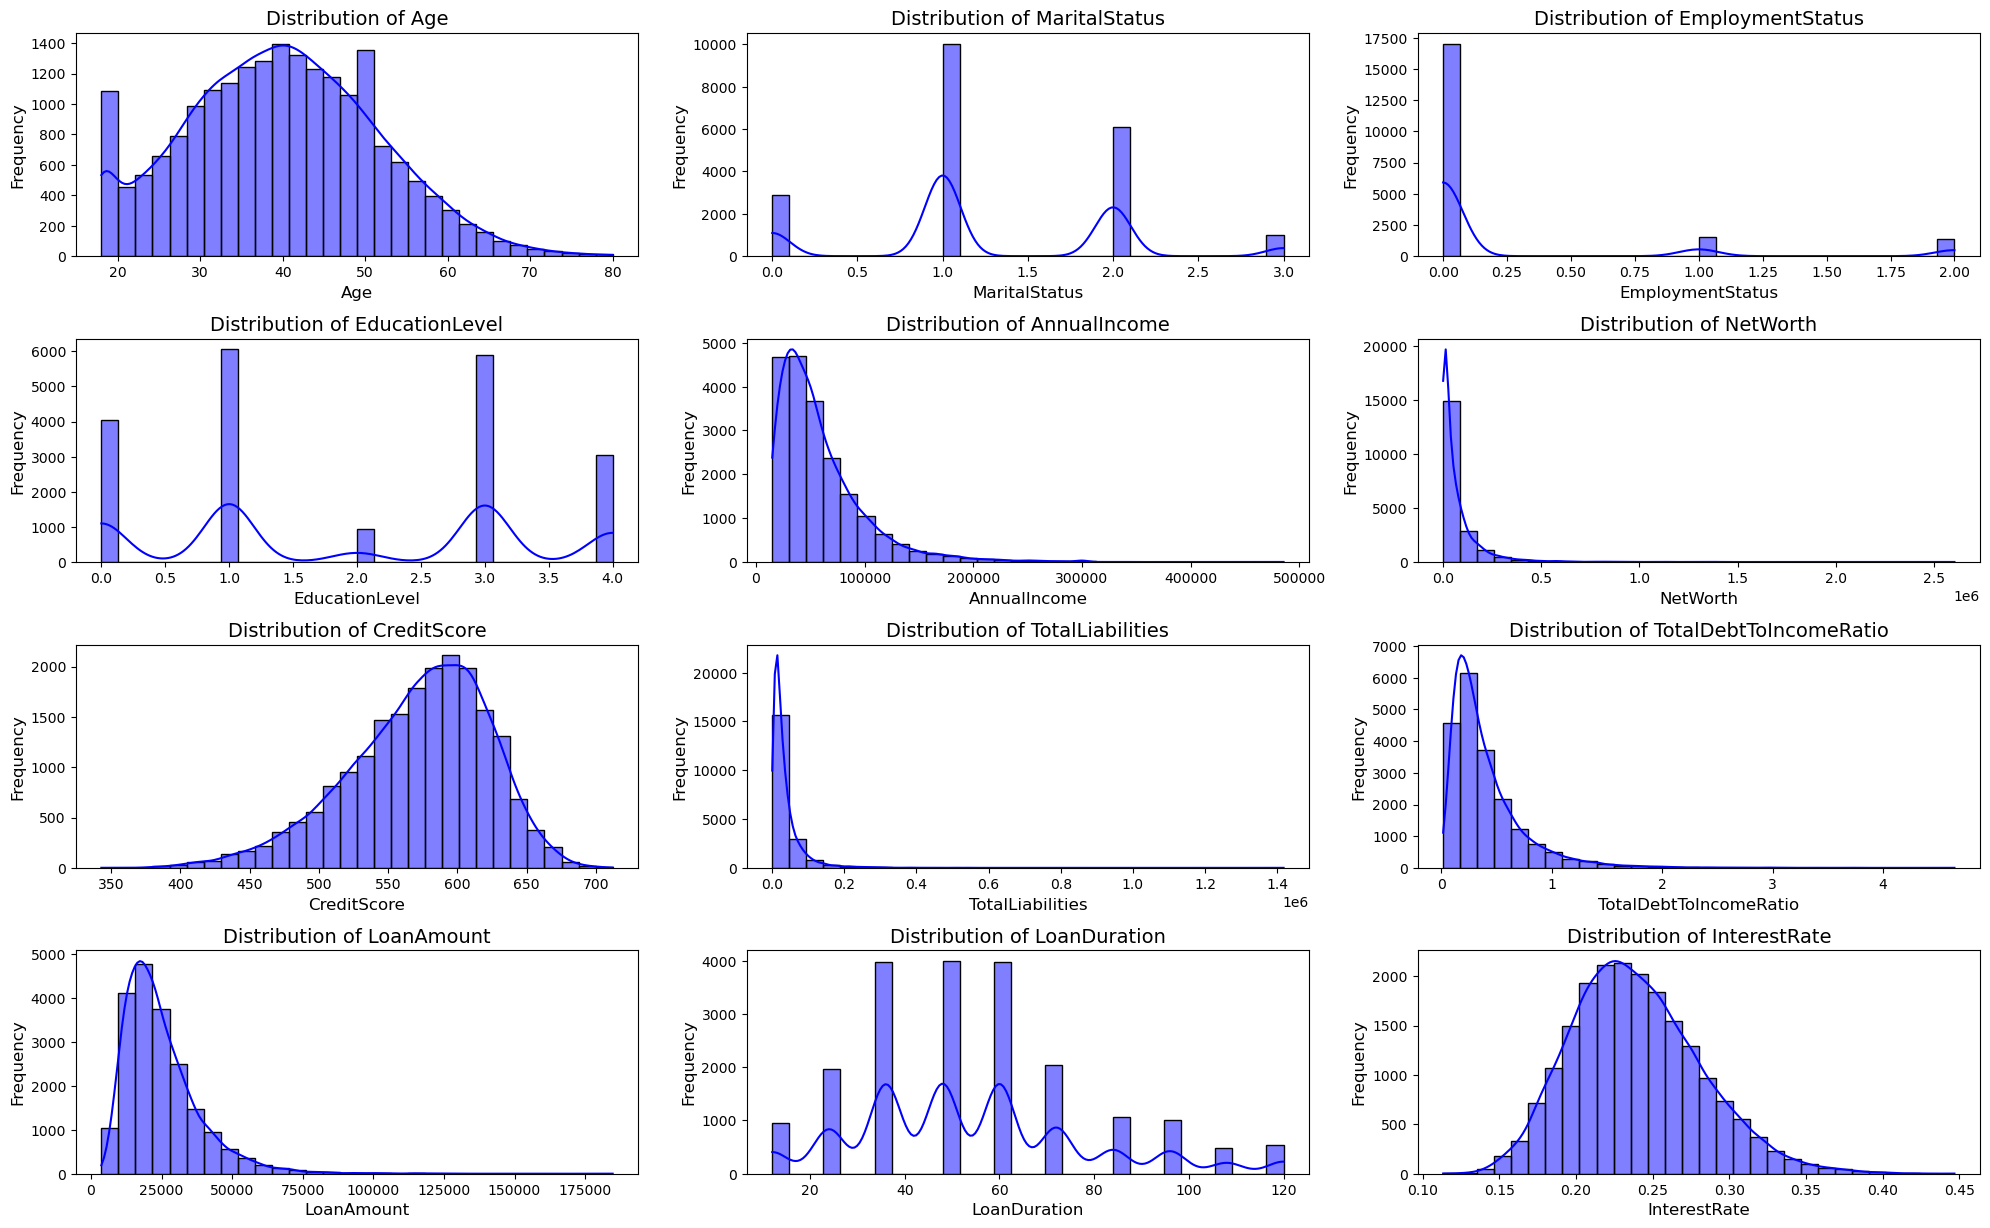

In [10]:
# Manually specified features for prediction
selected_features = [
    'Age',
    'MaritalStatus',
    'EmploymentStatus',
    'EducationLevel',
    'AnnualIncome',
    'NetWorth',
    'CreditScore',
    'TotalLiabilities',
    'TotalDebtToIncomeRatio',
    'LoanAmount',
    'LoanDuration',
    'InterestRate',
]

# Plot distribution graphs for the selected features
print("\nGenerating distribution plots for selected features...")

# Set up the figure
plt.figure(figsize=(20, 15))

# Loop through selected features and create subplots
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 3, i)  # Create a grid of subplots (5 rows x 3 columns)
    sns.histplot(data[feature], kde=True, color="blue", bins=30)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


Model saved to model.pkl

Model Accuracy: 0.9196

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3745
           1       0.87      0.80      0.83      1255

    accuracy                           0.92      5000
   macro avg       0.90      0.88      0.89      5000
weighted avg       0.92      0.92      0.92      5000



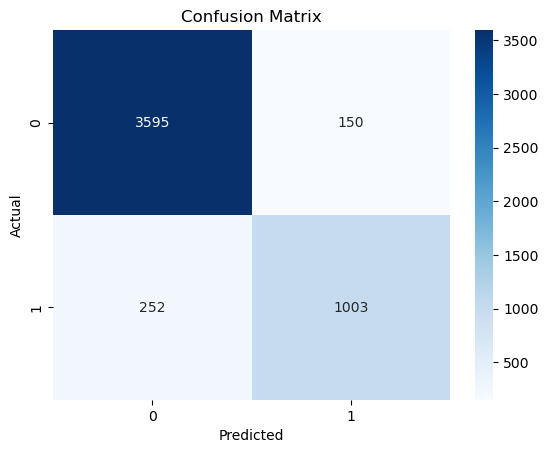

In [11]:
# Prepare the dataset for classification
X = data[selected_features].values  # Add .values to convert to numpy array
y = data['LoanApproved'].values    # Add .values to convert to numpy array

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\nModel saved to {model_filename}")

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Convert numpy arrays back to DataFrames for saving to CSV
pd.DataFrame(X_train, columns=selected_features).to_csv('X_train.csv', index=False)
pd.DataFrame(X_test, columns=selected_features).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train, columns=['LoanApproved']).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test, columns=['LoanApproved']).to_csv('y_test.csv', index=False)